## data load

In [1]:
# 필요 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
import mpl_finance as matfin
import seaborn as sns
# Jupyter Notebook에서 Matplotlib 출력을 위한 설정
%matplotlib inline
# 한글 사용을 위한 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# Matplotlib 출력 크기 설정
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [10]:
import pandas as pd

## data crawling

In [6]:
def getStock(code):
    stock_df = pd.DataFrame()
    for idx in range(10):
        unit_df = pd.read_html('http://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'.format(code, str(idx+1)), header=0)[0]
        unit_df = unit_df.rename(columns={'날짜': 'day', '종가': 'closingPrice', '전일비': 'variation', '시가': 'openingPrice'
                                     , '고가': 'highestPrice', '저가': 'lowestPrice', '거래량': 'volume'})
        unit_df['code'] = code
        stock_df = pd.concat([stock_df,unit_df.dropna()])
    stock_df = stock_df.reset_index()
    
    return stock_df

stock_df = getStock('035420')
print(stock_df.head())
print(stock_df.count())

   index         day  closingPrice  variation  openingPrice  highestPrice  \
0      1  2018.09.10      725000.0     7000.0      720000.0      732000.0   
1      2  2018.09.07      732000.0     2000.0      732000.0      735000.0   
2      3  2018.09.06      730000.0     6000.0      736000.0      740000.0   
3      4  2018.09.05      736000.0    19000.0      753000.0      753000.0   
4      5  2018.09.04      755000.0     1000.0      757000.0      757000.0   

   lowestPrice    volume    code  
0     720000.0   58832.0  035420  
1     722000.0   64573.0  035420  
2     727000.0   70491.0  035420  
3     727000.0  118285.0  035420  
4     749000.0   37456.0  035420  
index           100
day             100
closingPrice    100
variation       100
openingPrice    100
highestPrice    100
lowestPrice     100
volume          100
code            100
dtype: int64


## data trans

In [7]:
stock_df = stock_df.sort_values(by=['day'])
date = stock_df['day'].tolist()
dataset = stock_df.loc[:,['openingPrice', 'closingPrice',  'highestPrice', 'lowestPrice']]
dataset = dataset.T.as_matrix()

C:\Users\jayhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


## create graph

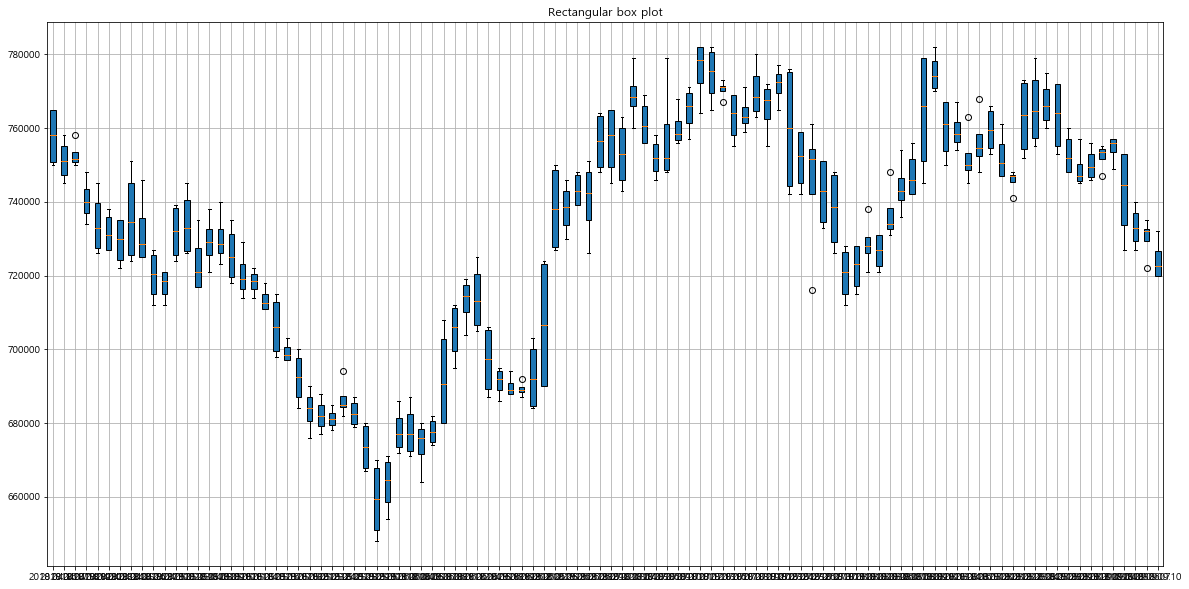

In [8]:
import matplotlib.pyplot as plt

labels = date


plt.figure(figsize=(20,10))
# rectangular box plot
plt.boxplot(dataset,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
plt.title('Rectangular box plot')
plt.show()

## using other package

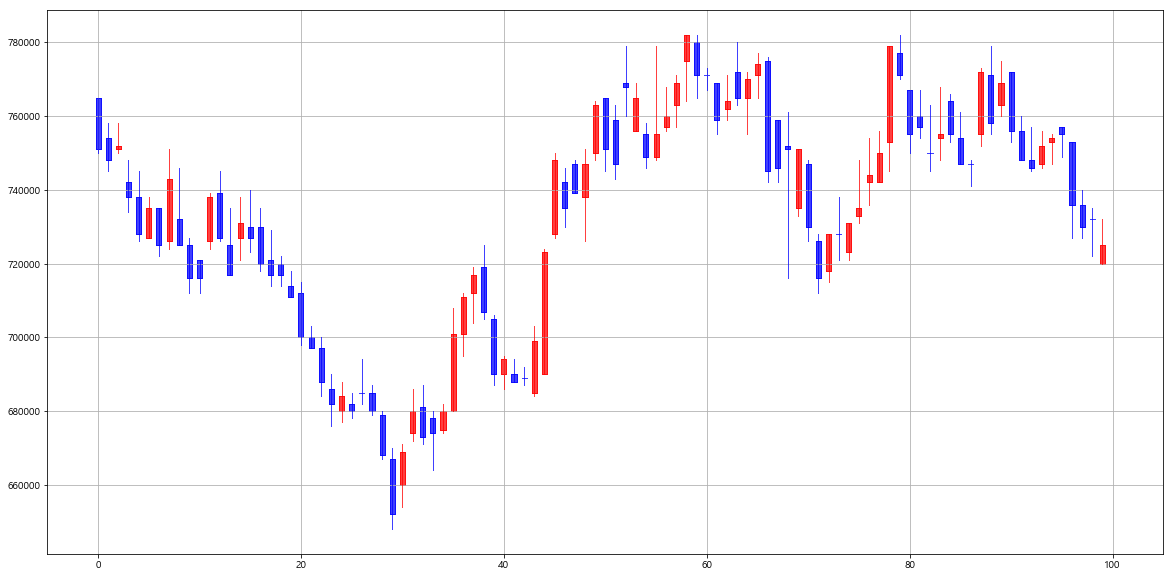

In [9]:
import matplotlib.pyplot as plt
# import matplotlib.finance as matfin
import mpl_finance as matfin # pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

matfin.candlestick2_ohlc(ax, stock_df['openingPrice'], stock_df['highestPrice'], stock_df['lowestPrice'],
                         stock_df['closingPrice'], width=0.5, colorup='r', colordown='b')
plt.show()

##### End of Document